In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
df = pd.read_excel("PF_data.xlsx",parse_dates=[0])
df.describe()

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Close
count,2610.000000
mean,1763.243579
std,303.377638
min,1095.040000
25%,1544.320000
50%,1761.855000
75%,1966.397500
max,2447.030000


In [2]:
df.index=df.pop('Date')
df.describe()
#df.index=




,Close
count,2610.000000
mean,1763.243579
std,303.377638
min,1095.040000
25%,1544.320000
50%,1761.855000
75%,1966.397500
max,2447.030000


In [3]:
df.describe()

,Close
count,2610.000000
mean,1763.243579
std,303.377638
min,1095.040000
25%,1544.320000
50%,1761.855000
75%,1966.397500
max,2447.030000


In [4]:
new_df=df.drop_duplicates(subset=['Close'])
new_df.describe()
#new_df=df.drop_duplicates(keep='first')

,Close
count,2488.000000
mean,1763.077609
std,303.628075
min,1095.040000
25%,1544.020000
50%,1762.220000
75%,1965.857500
max,2447.030000


In [5]:
new_df[543:550]

,Close
Date,
2003-03-06,1182.82
2003-03-07,1192.61
2003-03-10,1161.85
2003-03-11,1152.15
2003-03-12,1157.61
2003-03-14,1199.55
2003-03-17,1242.09


In [6]:
df[570:589].drop_duplicates(subset=['Close'])

,Close
Date,
2003-03-10,1161.85
2003-03-11,1152.15
2003-03-12,1157.61
2003-03-13,1197.56
2003-03-14,1199.55
2003-03-17,1242.09
2003-03-18,1247.39
2003-03-19,1258.37
2003-03-20,1260.76


In [7]:
#dfrets = 100* new_df.pct_change().dropna()
#dfrets.describe()
df_log_rets = 100*np.log(new_df/new_df.shift(1)).dropna()

In [8]:
df_log_rets.describe()

,Close
count,2487.000000
mean,0.005645
std,1.383704
min,-9.459544
25%,-0.589166
50%,0.070151
75%,0.618994
max,10.958184


In [9]:
df_log_rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2487 entries, 2001-01-02 to 2010-12-31
Data columns (total 1 columns):
Close    2487 non-null float64
dtypes: float64(1)
memory usage: 38.9 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEA9A3860>], dtype=object)

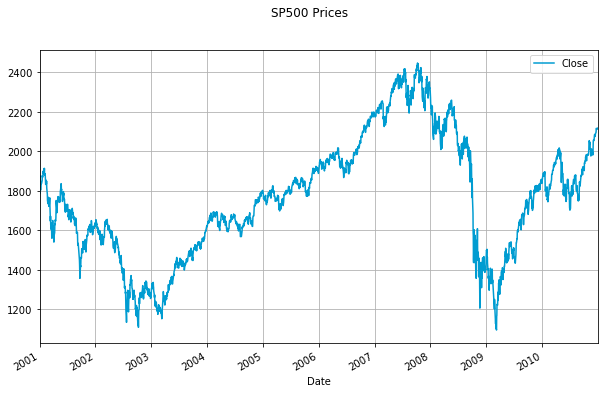

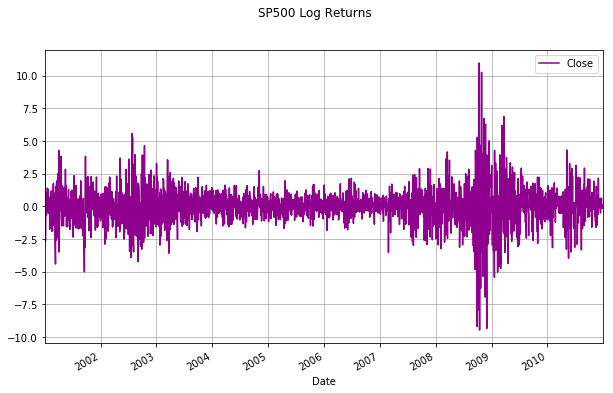

In [10]:
#plot prices and retunrs
new_df.plot(subplots=(2,1,1),grid=True,figsize=(10,6),color='#009CD1',title='SP500 Prices')
df_log_rets.plot(subplots=(2,1,2),grid=True,figsize=(10,6),color='#8E008D',title='SP500 Log Returns')

In [11]:
df_log_rets.describe()

,Close
count,2487.000000
mean,0.005645
std,1.383704
min,-9.459544
25%,-0.589166
50%,0.070151
75%,0.618994
max,10.958184


In [12]:
print(df_log_rets.kurt())
print(df_log_rets.skew())

Close    8.08306
dtype: float64
Close   -0.121035
dtype: float64


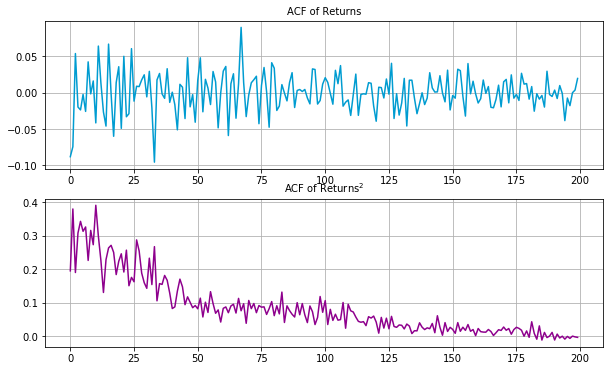

In [13]:
from statsmodels.tsa.stattools import acf

SP_acf=acf(df_log_rets.Close, nlags=200)
SP_acf2=acf(df_log_rets.Close**2, nlags=200)

plt.figure(figsize=(10,6),dpi=980)

p1 = plt.subplot(2,1,1)
p1.grid(True)
p1.plot(SP_acf[1:],color='#009CD1')
p1.set_title('ACF of Returns',fontsize=10)

p2 = plt.subplot(2,1,2)
p2.grid(True)
p2.plot(SP_acf2[1:],color='#8E008D')
p2.set_title('ACF of Returns$^{2}$',fontsize=10)


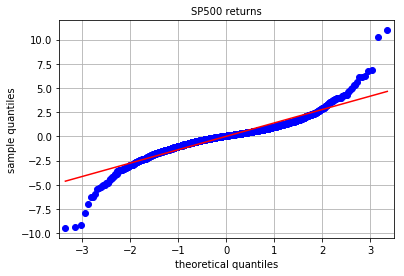

In [14]:
plt.figure()
sm.qqplot(df_log_rets.Close,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('SP500 returns',fontsize=10)


In [15]:
?df_log_rets.hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEABFBA20>]], dtype=object)

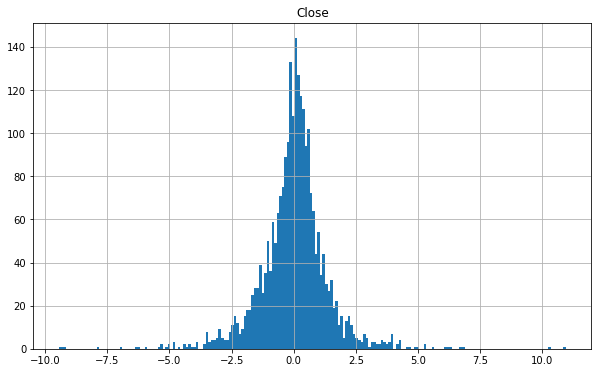

In [16]:
df_log_rets.hist(bins=200,figsize=(10,6))

In [17]:
def riskmetrics_volatilities(parameters, data, sigma2):
        alpha = parameters[0]
        beta = parameters[1]
        T=len(data)

        for t in range(1,T):
            sigma2[t]=(alpha*data[t-1]**2+beta*sigma2[t-1]) #yyf v2
        
        return np.copy(sigma2)

In [18]:
def VaR_norm(vols, p):
    T=len(vols)
    invpdf=ss.norm.ppf(p)
    VaR =-invpdf*vols
    return VaR
    

Type     || mean|| std|| skew|| kurt||
Original data:   0.00407943774329 0.99979893435 -0.120962188747877 8.064407098467829
After riskmetrics:   0.0124745450137 1.0 -0.4025623285758116 2.206826358338118


FileNotFoundError: [Errno 2] No such file or directory: './yyfQFdataout/PF_yyf_CH01_results.csv'

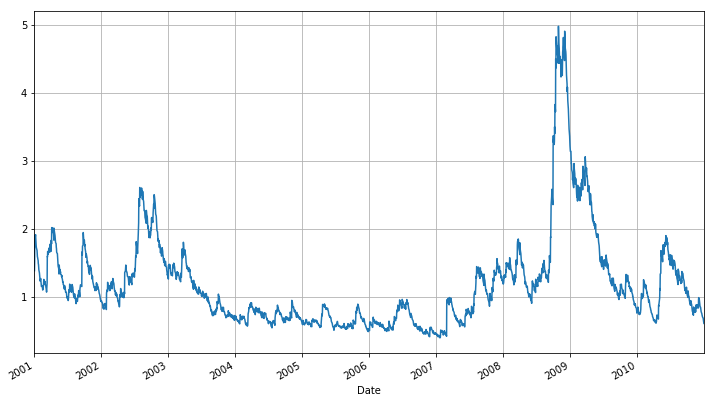

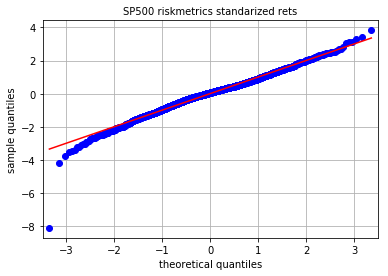

In [20]:
tmpdata= df_log_rets.Close

mean_rts = tmpdata.mean()
var_rts  = tmpdata.var()
std_rts = tmpdata.std()

T=tmpdata.count()

sigma2 = np.ones(T)*(var_rts) #initialized volatilities
analized=1 # or we should set to 252
startingVals = np.array([mean_rts,.06,.94]) ##change

sigma2final = riskmetrics_volatilities(startingVals[1:],np.array(tmpdata), sigma2)

rm_vol=np.sqrt(analized*sigma2final)

CH01_results = pd.DataFrame(new_df.Close,index=new_df.index,columns=['Close'])

CH01_results.loc[1:,'Log Returns'] = tmpdata
CH01_results.loc[1:,'RMVolatilities'] = rm_vol

#CH01_results = pd.DataFrame(rm_vol,index=new_df.index,columns=['Conditional Std Deviation'])

CH01_results.RMVolatilities.plot(figsize=(12,7),grid=True)


normalized_new_rts=np.asarray(tmpdata)/rm_vol

CH01_results.loc[1:,'Standerized Returns'] = normalized_new_rts

#CH01_results.loc[:,'Close'] = new_df.Close



VaR = np.zeros(T) #initialized VaR
p=0.01
VaR = VaR_norm(rm_vol,p)
CH01_results.loc[1:,'VaR'] = VaR

# call our function ‘mynormqqplot’
#gr_vol

ttmp=normalized_new_rts/(normalized_new_rts.std())
plt.figure()
sm.qqplot(ttmp,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('SP500 riskmetrics standarized rets',fontsize=10)


#calculate FOUR MOMENTS of standerized returns using Garch 11
a1=ttmp.mean()
a2=ttmp.std()
a3=ss.skew(ttmp)
a4 =ss.kurtosis(ttmp)

std_rts=tmpdata.std()
normalized_log_rts=np.asarray(tmpdata)/std_rts

#calculate FOUR MOMENTS of original log returns
b1=normalized_log_rts.mean()
b2=normalized_log_rts.std()
b3=ss.skew(normalized_log_rts)
b4 =ss.kurtosis(normalized_log_rts)

print('Type     ||','mean||','std||','skew||','kurt||')
print('Original data:  ',b1,b2,b3,b4)
print('After riskmetrics:  ',a1,a2,a3,a4)

CH01_results.to_csv("./yyfQFdataout/PF_yyf_CH01_results.csv",index_label='date')
CH01_results.to_excel("./yyfdQFataout/PF_yyf_CH01_results.xls",index_label='date')



In [22]:
df.to_excel("yyfdataout/PF_SP_pdrd2wrt.xls",index_label='date')

In [23]:
CH01_results.head()

,Close,Log Returns,RMVolatilities,Standerized Returns,VaR
Date,,,,,
2001-01-01,1837.36,NaN,NaN,NaN,NaN
2001-01-02,1785.86,-2.842967,1.383704,-2.054606,3.218977
2001-01-03,1875.56,4.900719,1.511525,3.242236,3.516332
2001-01-04,1855.82,-1.058063,1.894373,-0.558530,4.406969
2001-01-05,1807.13,-2.658670,1.854858,-1.433355,4.315045
